In [2]:
#pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [1]:
def Aplot(ticker):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mpl_dates
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import mplfinance as mpf
    from mplfinance.original_flavor import candlestick_ohlc
    from datetime import datetime
    import dateutil
    from dateutil.relativedelta import relativedelta
    import requests

    fm_key = '8a1cf9d14d53126b05c8a7636fe3d006'

    today = datetime.today().strftime('%Y-%m-%d')
    delta = dateutil.relativedelta.relativedelta(months = 6)
    begin = (datetime.today() - delta).strftime('%Y-%m-%d')

    data = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/\
    {ticker}?from={begin}&to={today}&apikey={fm_key}').json()
    data = pd.DataFrame(data['historical'])
    data = data.sort_values('date').reset_index()

    def ema(n, close):
        return close.ewm(span = n).mean()

    data['ema8'] = ema(8, data.close)
    data['ema21'] = ema(21, data.close)
    data['ema50'] = ema(50, data.close)
    data['vol10'] = data['volume'].rolling(window = 10).mean()

    vup = []
    vup.append(data.loc[0, 'date'])
    vdown = []
    for i in range(1, len(data)):
        if data.loc[i, 'close'] >= data.loc[i-1, 'close']:
            vup.append(data.loc[i, 'date'])
        if data.loc[i, 'close'] < data.loc[i-1, 'close']:
            vdown.append(data.loc[i, 'date'])

    sns.set_theme()
    plt.rcParams['axes.xmargin'] = 0
    plt.rcParams['figure.figsize'] = (15, 10)
    fig, axs = plt.subplots(2, gridspec_kw={'height_ratios': [7, 3]})

    data['Date'] = pd.to_datetime(data.date)
    data['Date'] = data['Date'].apply(mpl_dates.date2num)

    data['date'] = pd.to_datetime(data.date)
    data['date'] = data['date'].apply(mpl_dates.date2num)
    data = data.set_index('date')

    data['ema8'].plot(ax = axs[0], label = 'EMA_8days')
    data['ema21'].plot(ax = axs[0], label = 'EMA_21days')
    data['ema50'].plot(ax = axs[0], label = 'EMA_50days')

    data_plot = data.loc[:,['Date', 'open', 'high', 'low', 'close']]
    candlestick_ohlc(axs[0], data_plot.values, width = 0.6,\
                     colorup = 'green', colordown = 'red', alpha=0.8)

    vup = mpl_dates.date2num(vup)
    vdown = mpl_dates.date2num(vdown)
    axs[1].bar(x = vup, height = data.loc[vup, 'volume'], color = 'green')
    axs[1].bar(x = vdown, height = data.loc[vdown, 'volume'], color = 'red')
    data['vol10'].plot(ax = axs[1], label = 'Avg_10days', color = 'steelblue', alpha = 0.8)


    c = data.loc[:,'close'].tolist()[-1]
    c_an = (max(data.high) + 5 + c) / 2
    axs[0].annotate('Buy', xy = (data.loc[:,'Date'].tolist()[-1], c),\
                    xycoords = 'data', xytext = (max(data.Date) + 5, c_an),\
                    bbox = dict(boxstyle = 'round', fc = 'w', pad = 0.8),\
                    textcoords = 'data', arrowprops = dict(arrowstyle = '->',\
                                                           connectionstyle = 'arc3', color = 'black'))

    l = data.loc[:,'ema21'].tolist()[-1]
    l_an = min(data.loc[:,'ema8'].tolist()[-1], data.loc[:,'ema21'].tolist()[-1],\
               data.loc[:,'ema50'].tolist()[-1]) - 3
    axs[0].annotate('Stop', xy = (data.loc[:,'Date'].tolist()[-1], l),\
                    xycoords = 'data', xytext = (max(data.Date) + 5, l_an),\
                    bbox = dict(boxstyle = 'round', fc = 'w', pad = 0.8),\
                    textcoords = 'data', arrowprops = dict(arrowstyle = '->',\
                                                           connectionstyle = 'arc3', color = 'black'))


    a = data.loc[:,'volume'].tolist()[-1]
    vol_an = a + (max(data.volume) - a) / 2
    axs[1].annotate('Volume', xy = (data.loc[:,'Date'].tolist()[-1], a),\
                    xycoords = 'data', xytext = (max(data.Date), vol_an),\
                    bbox = dict(boxstyle = 'round', fc = 'w', pad = 0.8),\
                    textcoords = 'data', arrowprops = dict(arrowstyle = '->',\
                                                           connectionstyle = 'arc3', color = 'black'))

    axs[0].set_xlim(min(data.Date) - 3, max(data.Date) + 15)
    axs[1].set_xlim(min(data.Date) - 3, max(data.Date) + 15)
    axs[0].set_ylim(min(data.low) - 5, max(data.high) + 20)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    axs[0].xaxis.set_major_formatter(date_format)
    axs[1].xaxis.set_major_formatter(date_format)
    axs[0].yaxis.tick_right()
    axs[1].yaxis.tick_right()
    axs[0].set(xlabel = '', ylabel = 'Price')
    axs[1].set(xlabel = 'Date', ylabel = 'Volume')
    #axs[0].legend(loc = 'upper left')
    axs[0].legend()
    #axs[1].legend(loc = 'upper left')
    axs[1].legend()
    plt.xticks(np.arange(min(data.Date), max(data.Date) + 1, 14))
    axs[0].title.set_text(f'{ticker}')
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

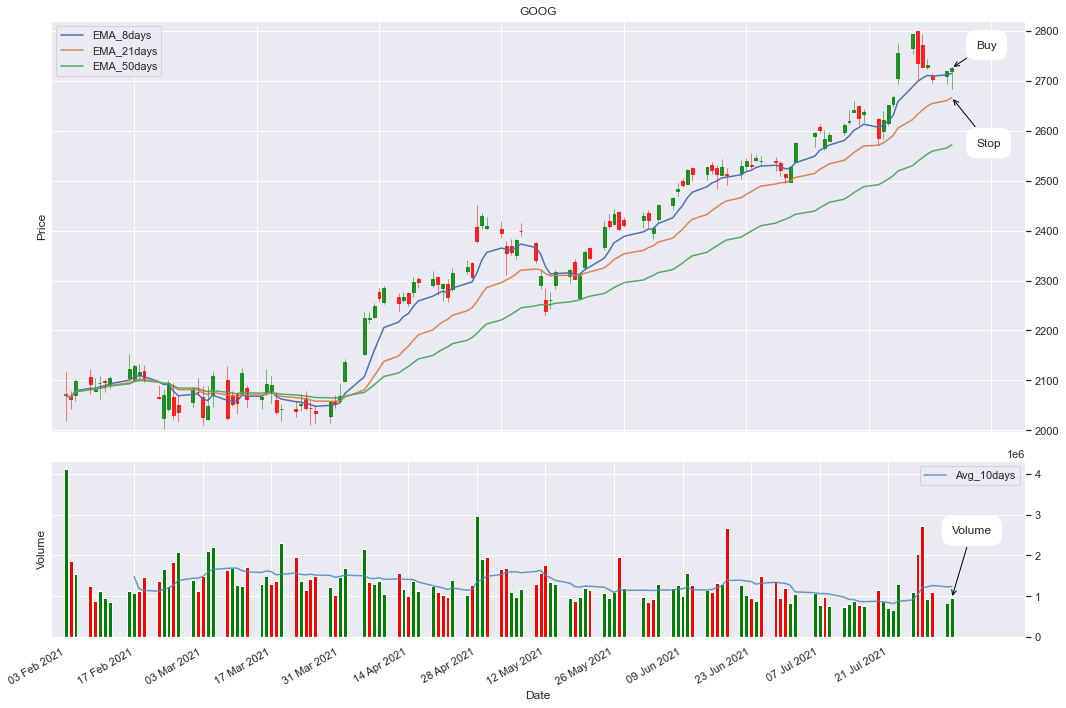

In [2]:
Aplot('GOOG')

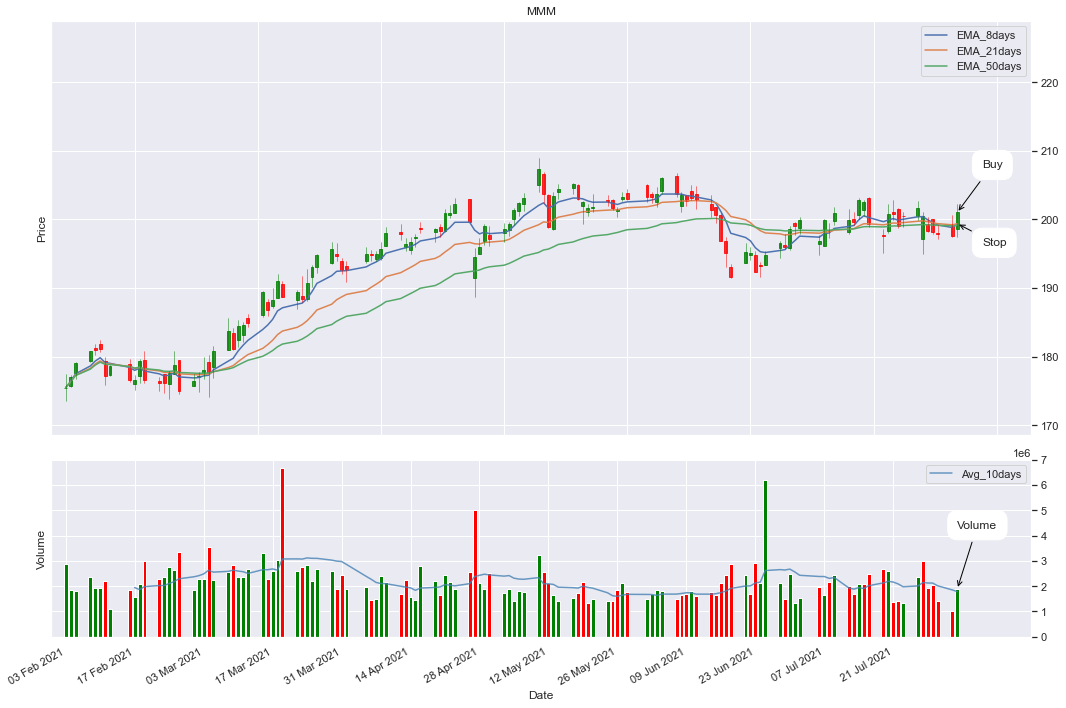

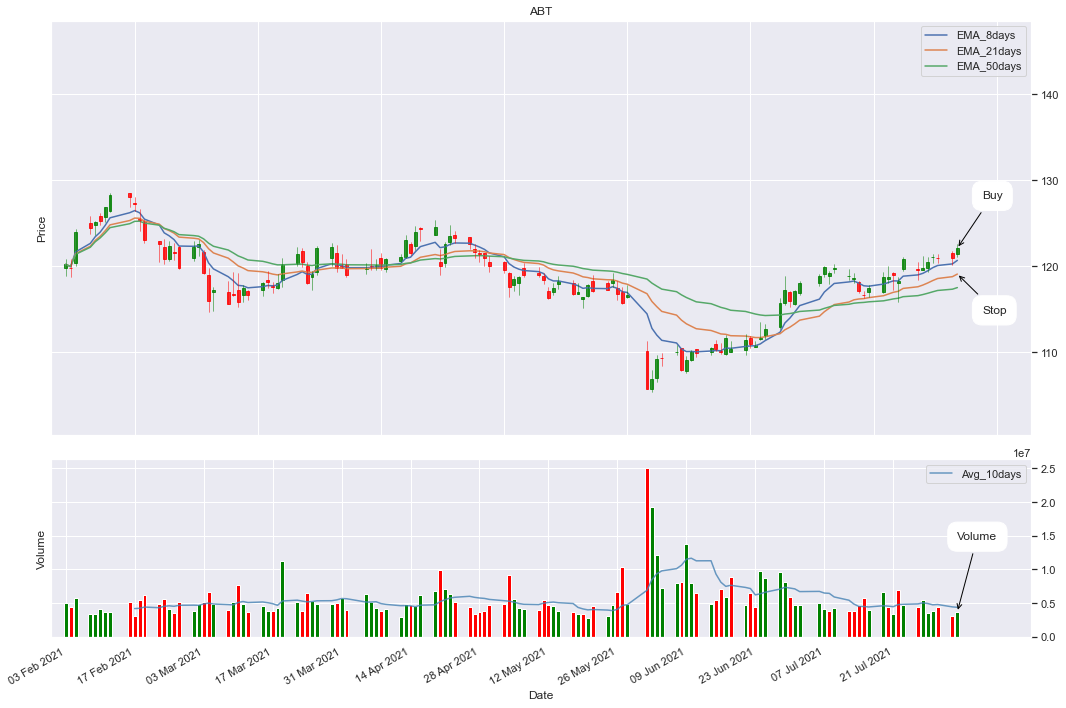

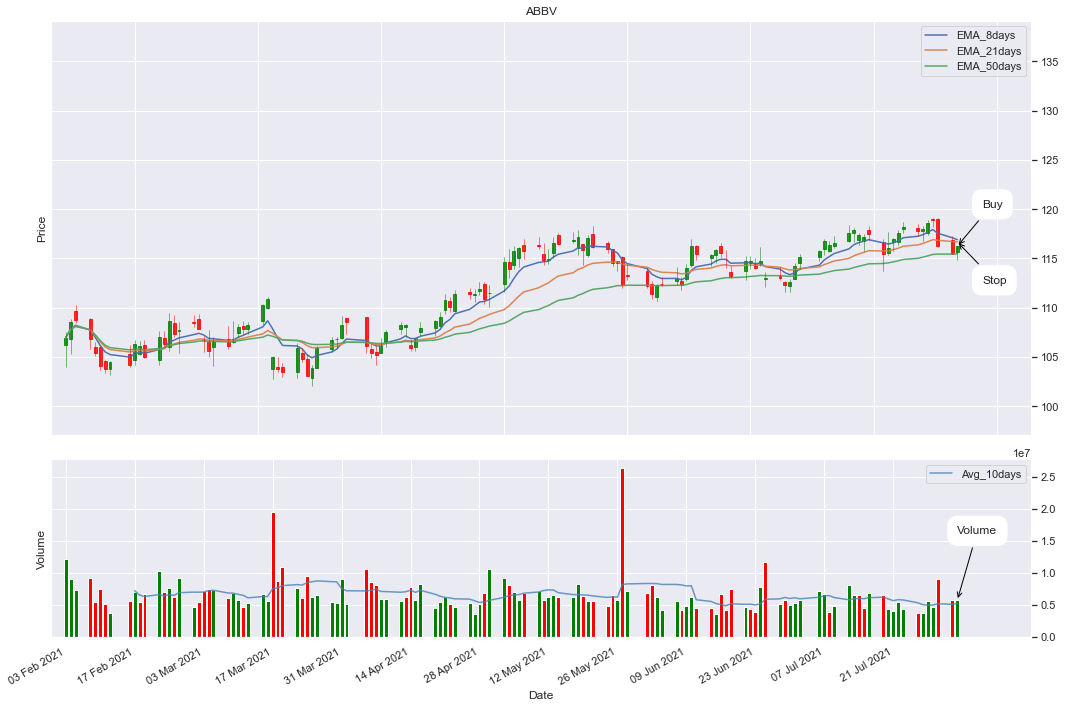

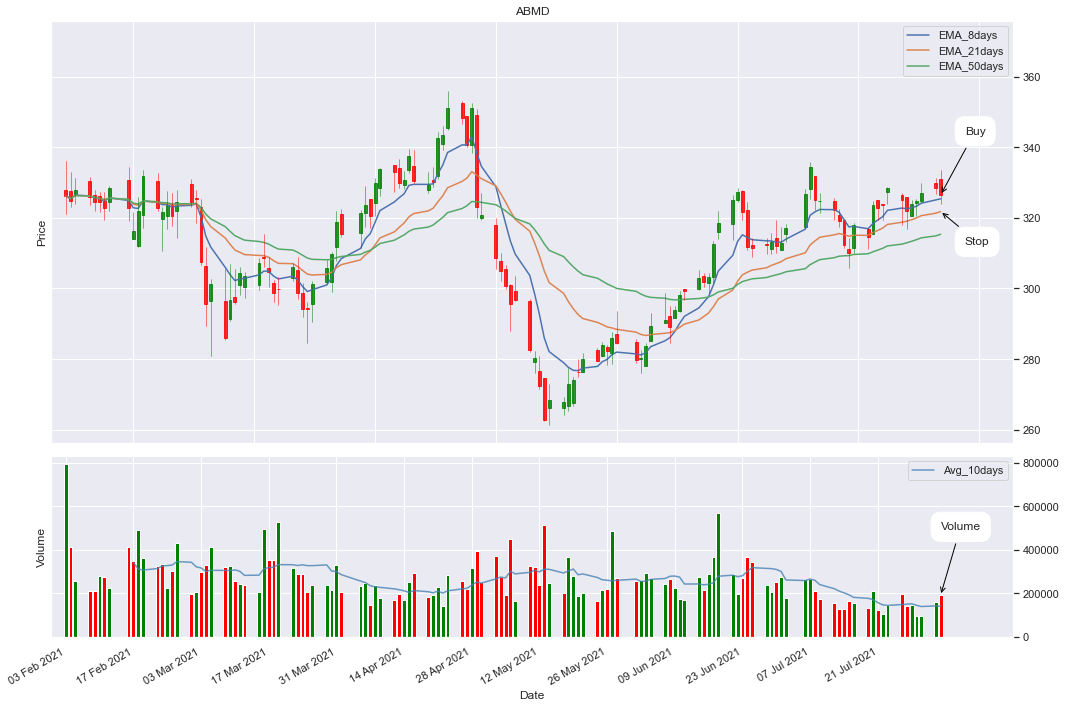

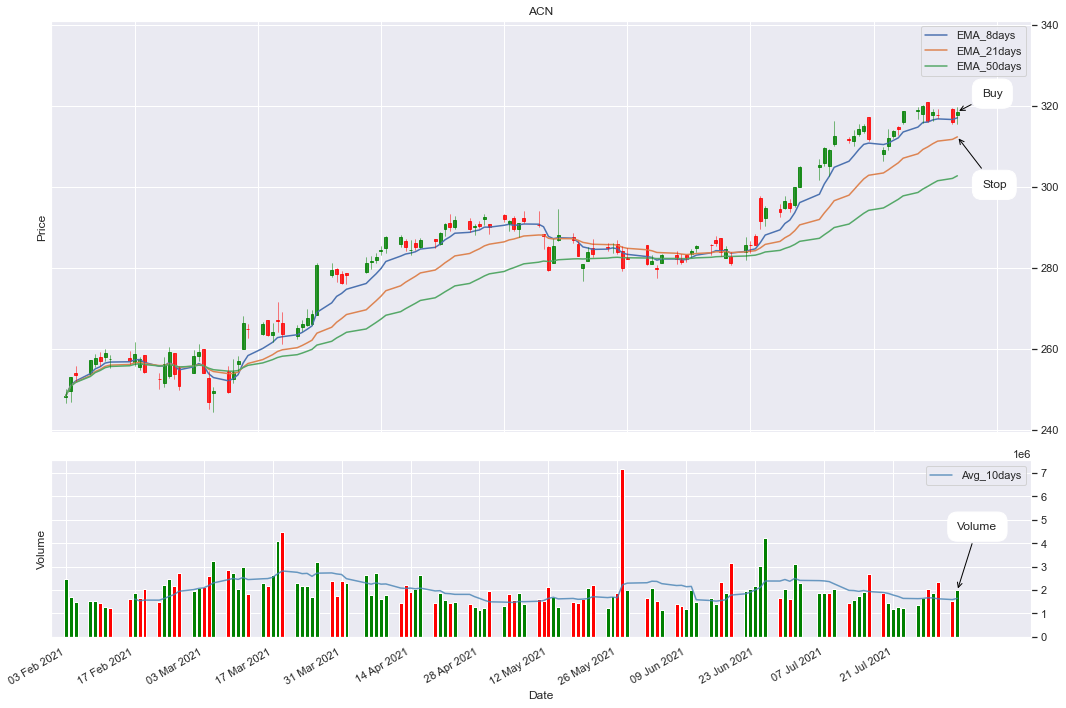

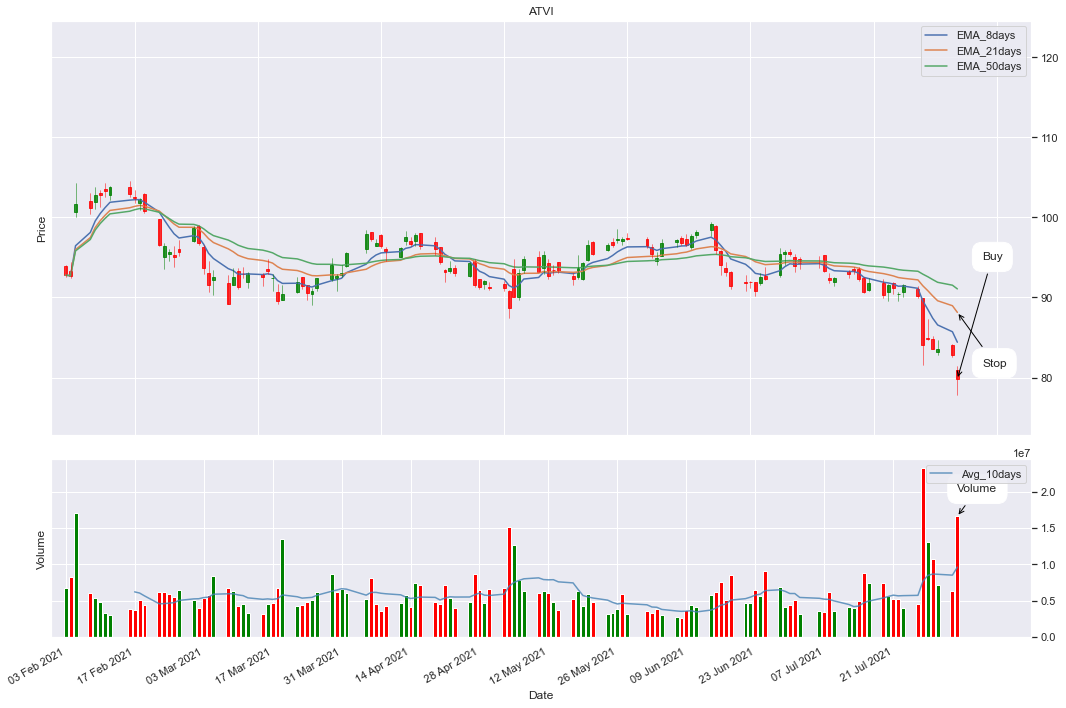

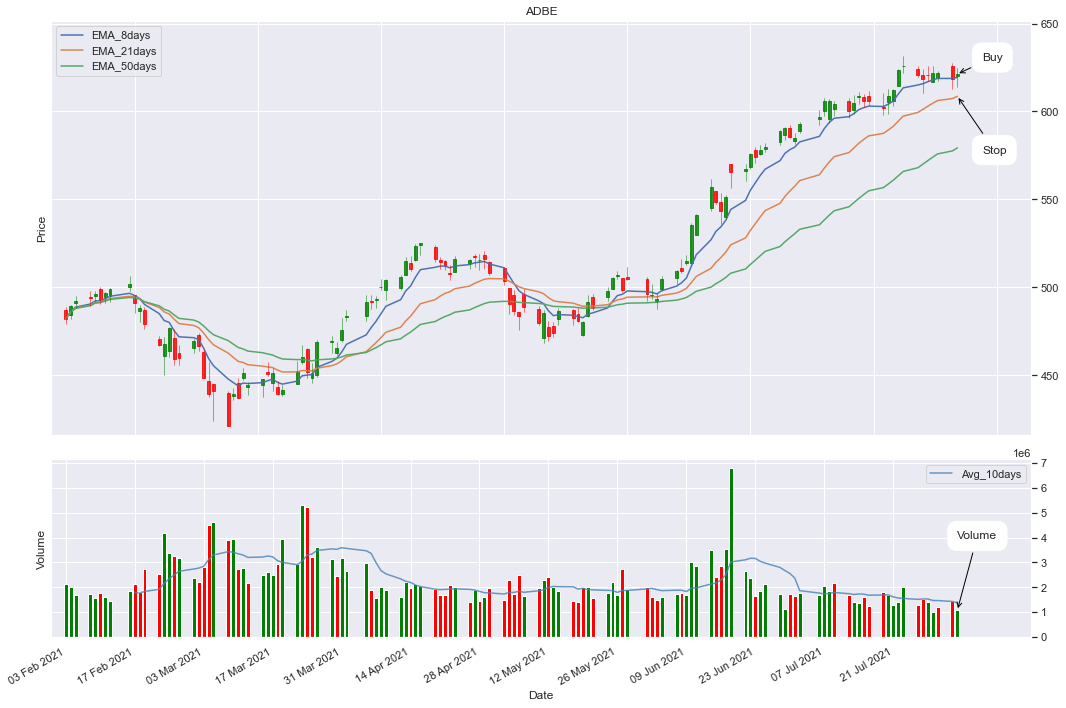

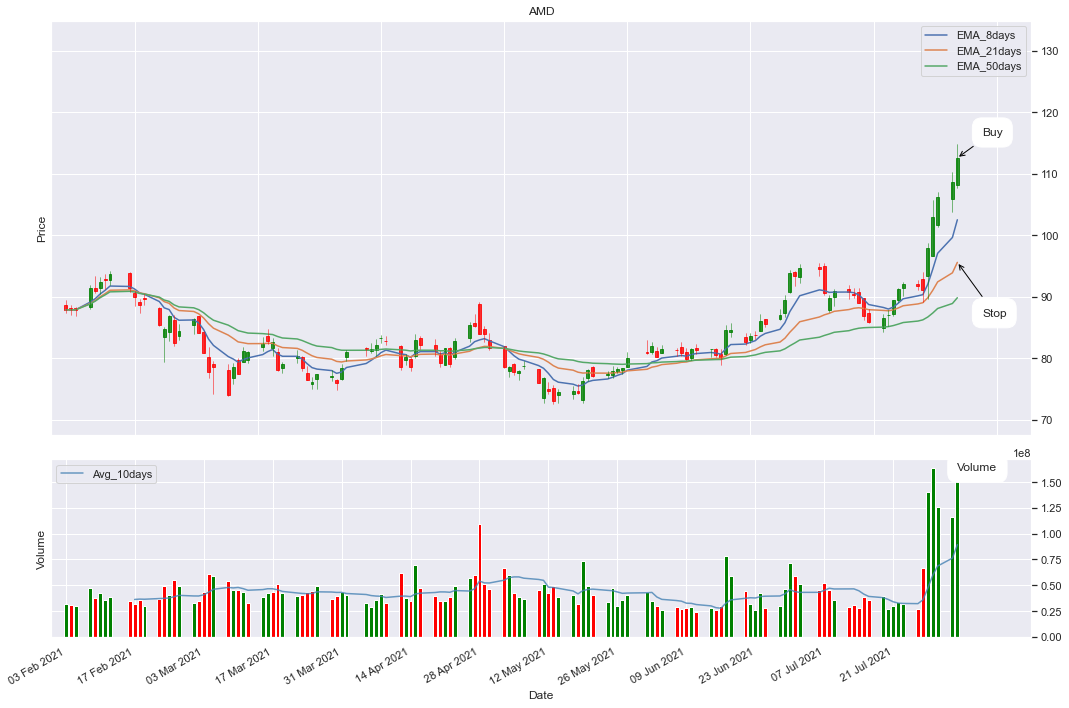

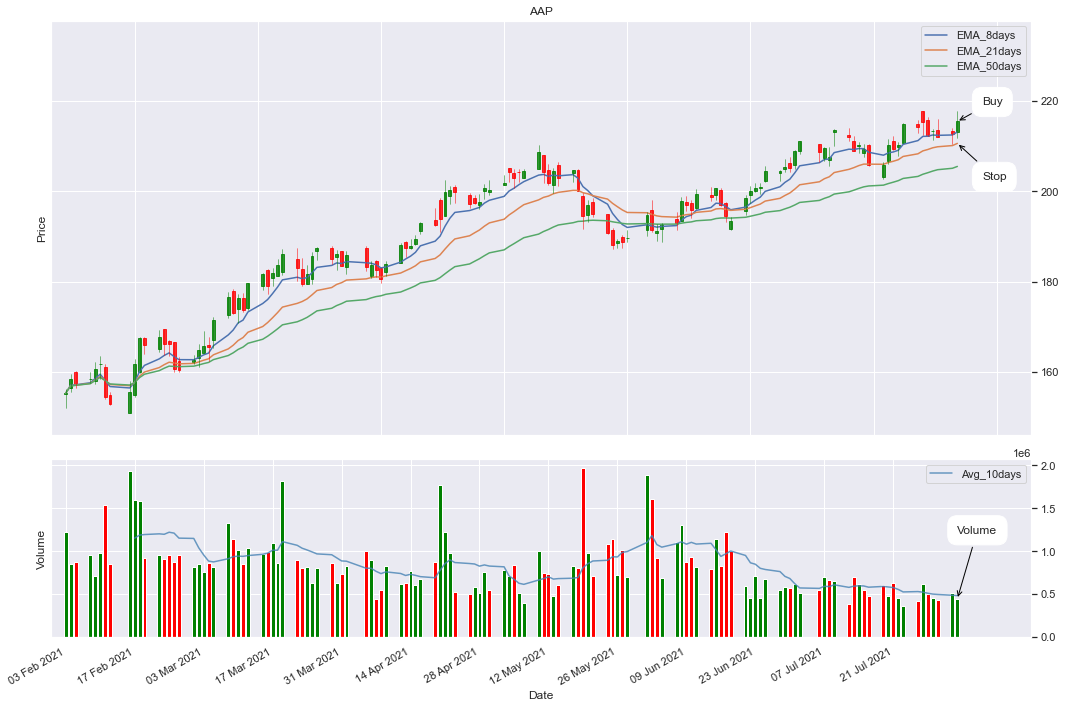

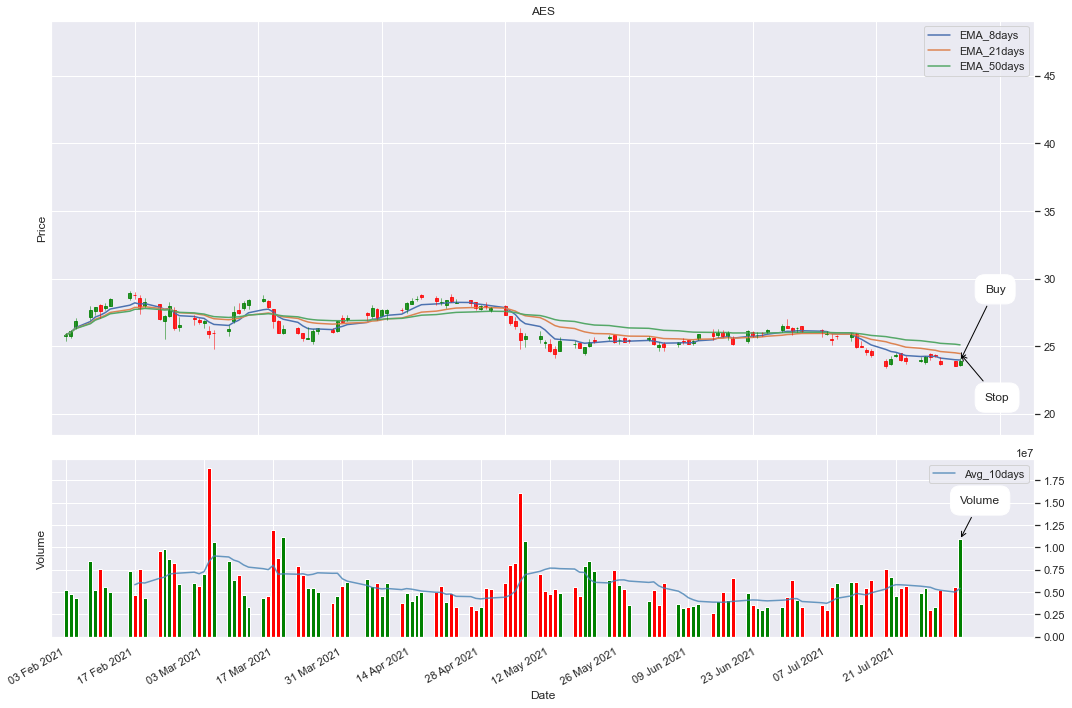

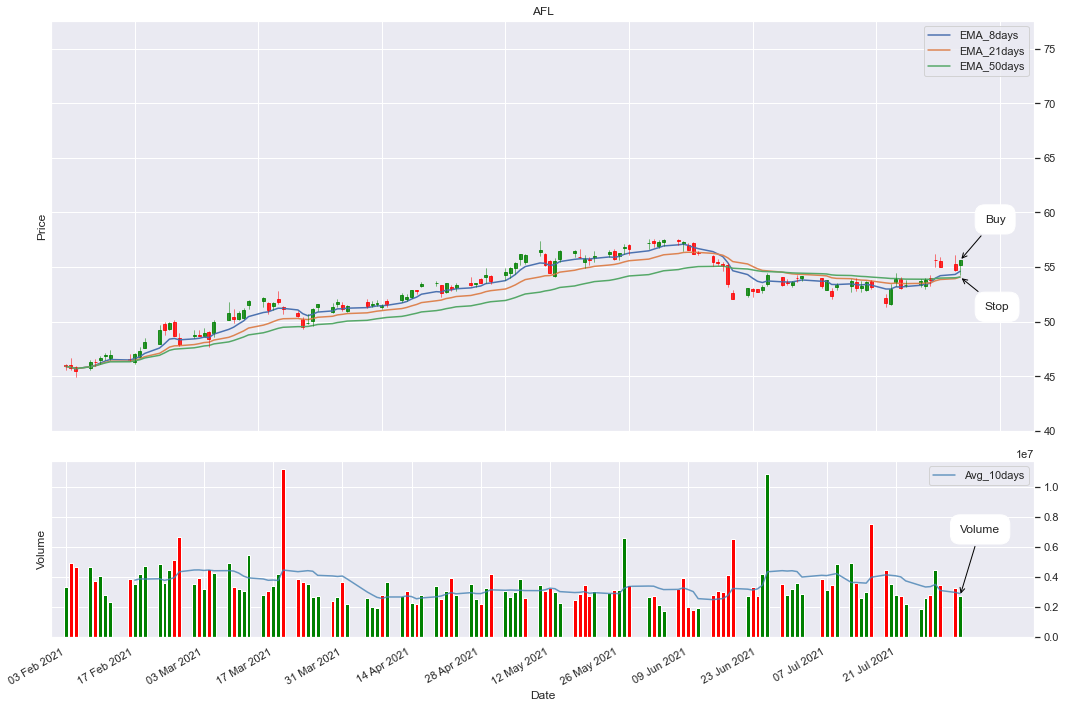

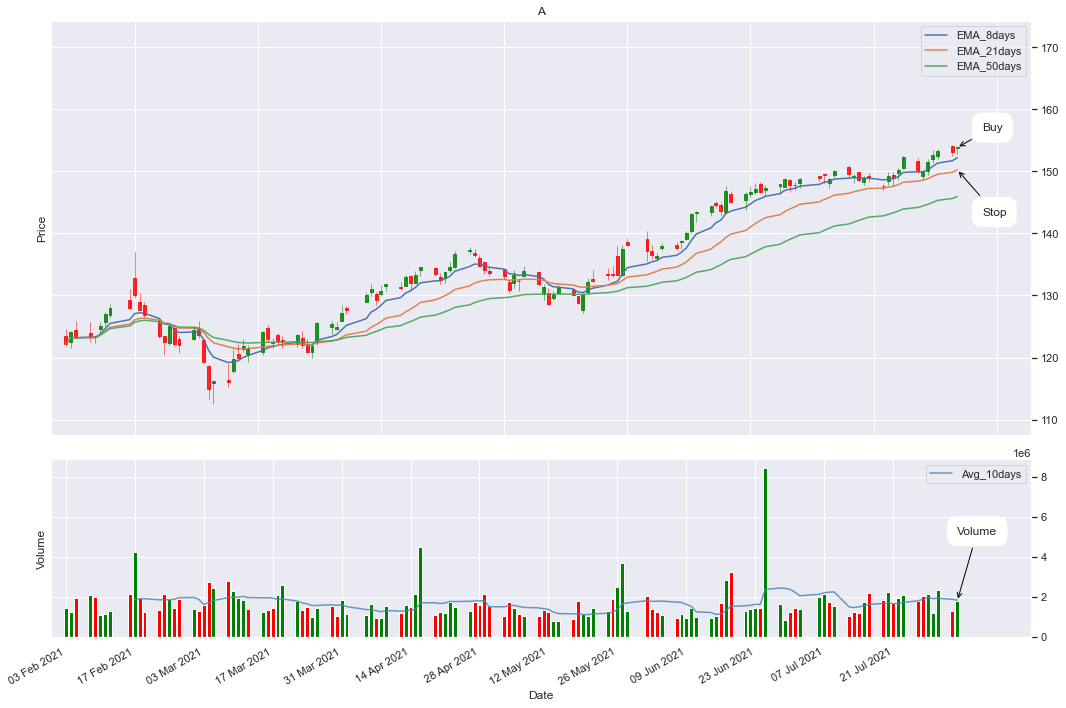

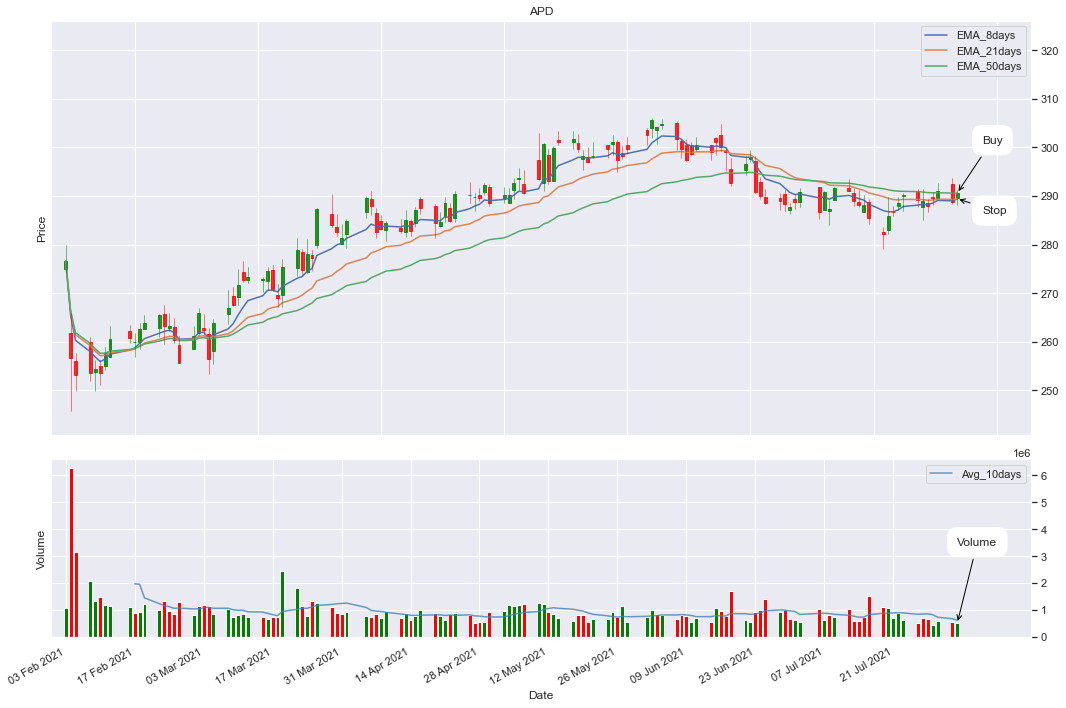

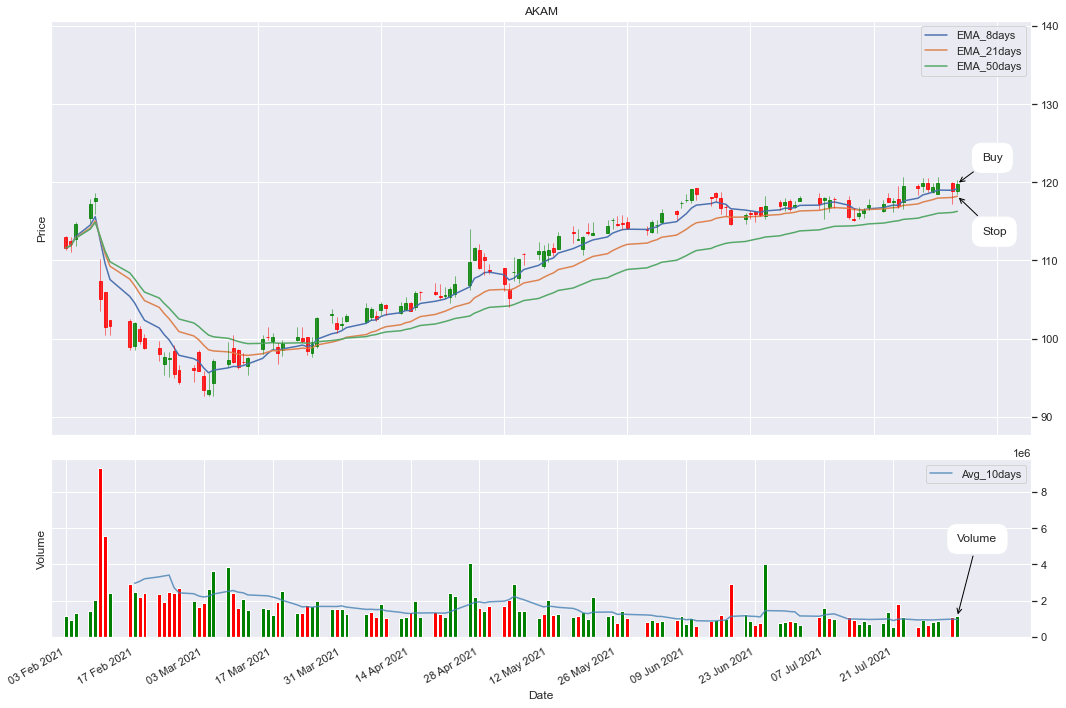

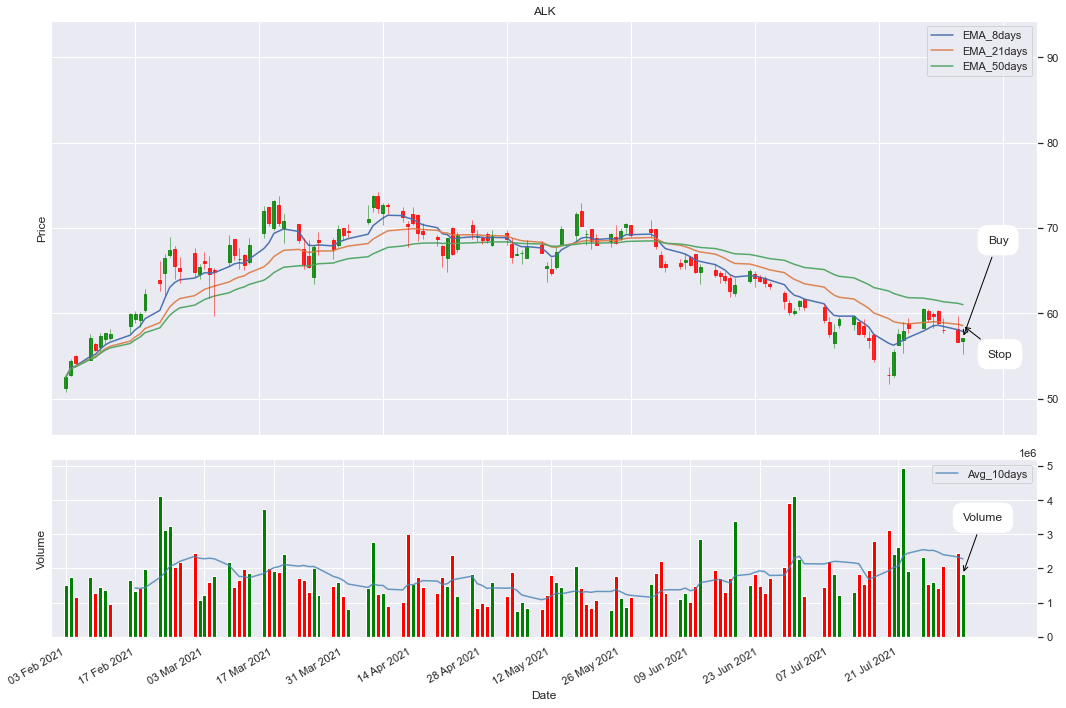

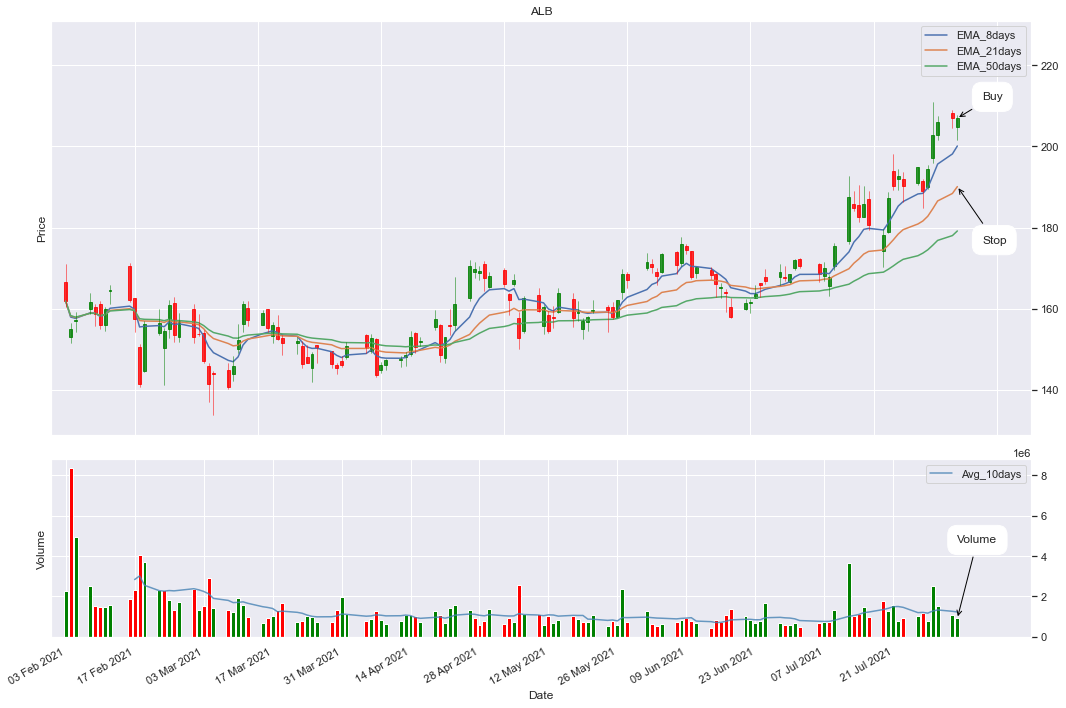

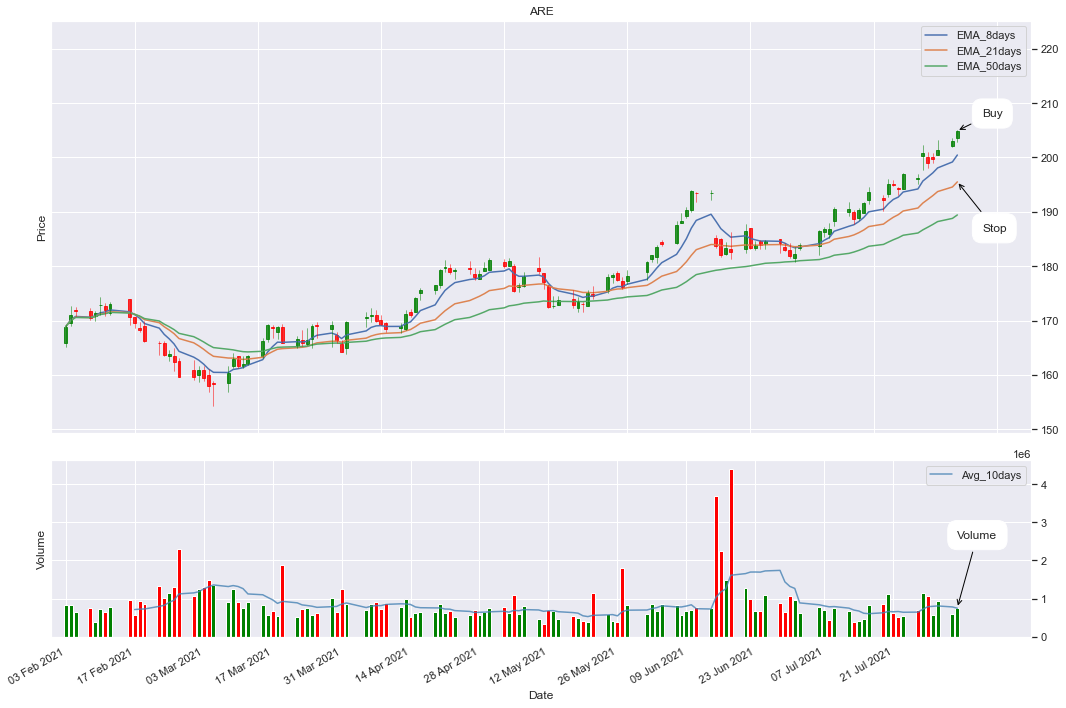

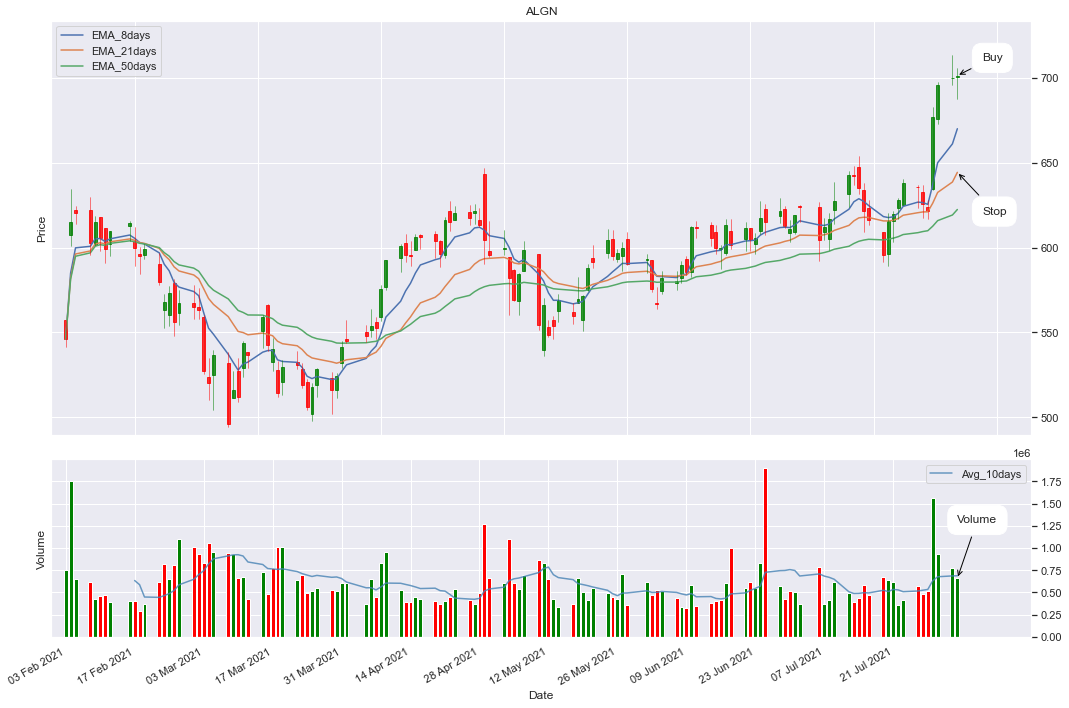

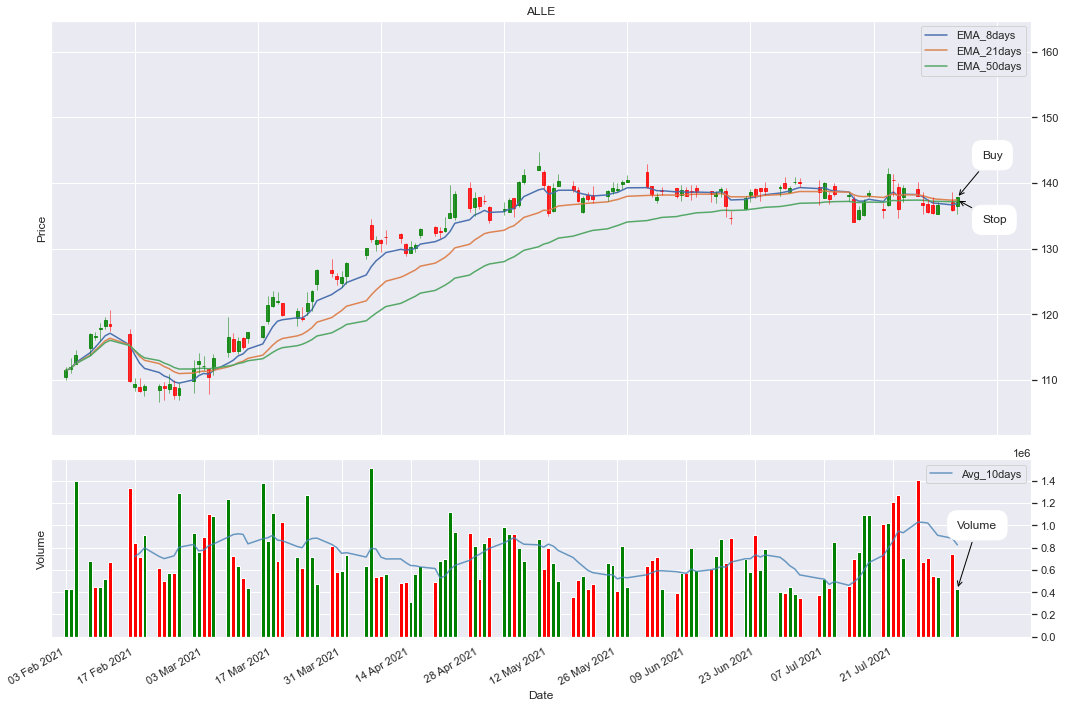

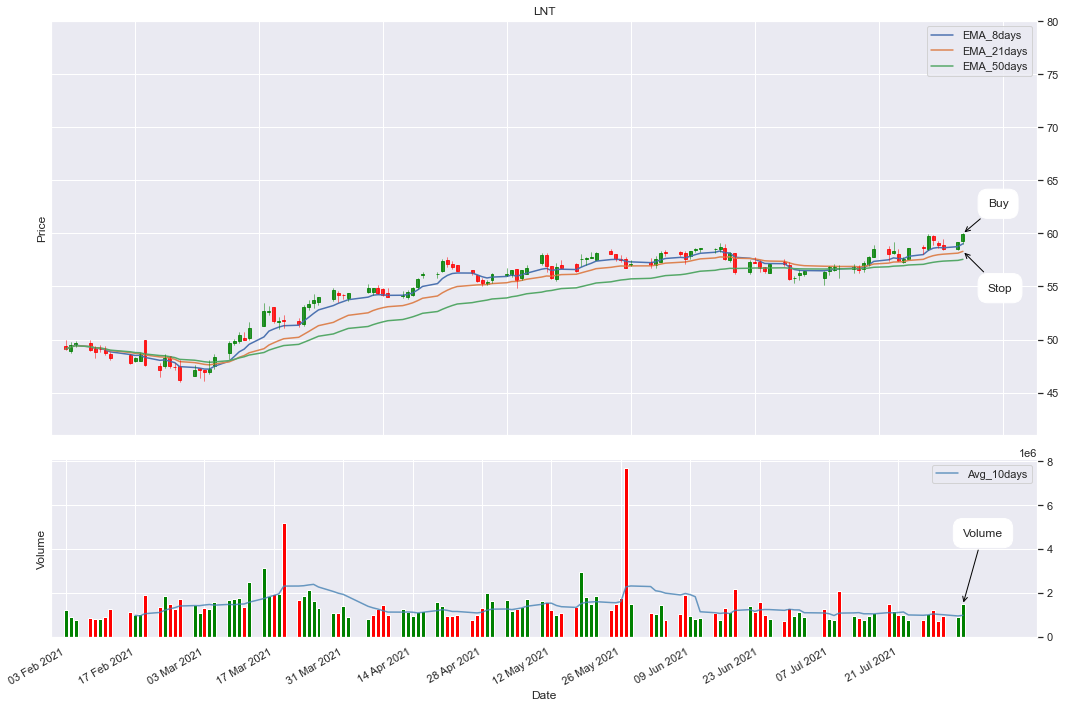

In [3]:
import requests
import pandas as pd

fm_key = '8a1cf9d14d53126b05c8a7636fe3d006'
tickers = requests.get(f'https://financialmodelingprep.com/api/v3/sp500_constituent?apikey={fm_key}').json()
tickers = pd.DataFrame(tickers)
tickers = tickers.loc[:,'symbol'].to_list()

for ticker in tickers[0:20]:
    Aplot(ticker)